In [ ]:
# Imports
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import time



# import cv2 as cv
# import json
# import shutil  #needed?

import torch
import pandas as pd
plt.ion()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd
%cd gdrive/MyDrive/AIOFGOD/concetto22_standby/

/content
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby


In [ ]:
%ls


DenseNet161_weights.pth                      train.csv
README_NHATS_Round_10_SP_ClockDrawings.pdf   TrainData/
sample_submission.csv                        TrainDataJPG/
test.csv                                     TrainDataJPGuncropped/
test_predictions1_densenet161_ep5_lr003.csv


In [ ]:
print(len(os.listdir('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainData')))

3098


In [ ]:
Data_path = '/content/drive/MyDrive/AIOFGOD/concetto22_standby/TrainData'
test_df = pd.read_csv('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/test.csv')
train_df = pd.read_csv('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/train.csv')

In [ ]:
test_df

,id
0,10002998.0
1,10003172.0
2,20004712.0
3,20004205.0
4,20000346.0
...,...
553,20001798.0
554,10006153.0
555,10010660.0
556,10008746.0


In [ ]:
train_df

,id,tar
0,20002859.0,5.0
1,10011157.0,5.0
2,10011996.0,5.0
3,10000364.0,5.0
4,20004294.0,3.0
...,...,...
2535,10008439.0,4.0
2536,10010259.0,5.0
2537,20000125.0,4.0
2538,10004738.0,4.0


In [ ]:
train_df['tar'].value_counts()

5.0    977
4.0    954
3.0    398
2.0    162
1.0     43
0.0      6
Name: tar, dtype: int64

In [ ]:
if( train_df.iloc[2,1]==5):
   print("YES")

YES


In [ ]:
print(type( train_df.iloc[2,0]))
print(type(  train_df.iloc[2,0].astype(int)))


<class 'numpy.float64'>
<class 'numpy.int64'>


In [ ]:
# to remove  90 , 80 ,50,30,10,2

Preparing the Data

In [ ]:
2.
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T 

In [ ]:
from PIL import Image

In [ ]:
# !mkdir TrainDataJPG

In [ ]:
!pwd

/content/gdrive/MyDrive/AIOFGOD/concetto22_standby


In [ ]:
os.listdir('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG')

In [ ]:
#@title
'''for file_ in os.listdir('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainData'):
    im = Image.open(os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainData' ,  f"{file_}"))
  
    rgb_im = im.convert('RGB')
    rgb_im.save(  os.path.splitext(os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', f"{file_}" ))[0] + ".jpg")
    print(os.path.splitext(os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', file_ ))[0] + ".jpg")'''

#used for converting tif to jpg

/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002412.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002494.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002531.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002355.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002403.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002328.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002351.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002340.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002462.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002334.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002418.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002366.jpg
/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002408.jpg

In [ ]:
len(os.listdir('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG'))

3098

Split in Train and Validation

Creating Data Loaders, Datasets and Visualization

In [ ]:
# # import os
# import pandas as pd
# from torchvision.io import read_image

# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.data_csv = pd.read_csv(annotations_file)
#         # self.df_labels = self.data_csv[]   #used 5 instead of 'label' as label gave error while eval ds
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform
#         self.COUNT= 0
#         # self.dataset = torch.tensor(self.data_csv.to_numpy())

#         # self.labeels = torch.tensor(self.df_labels.to_numpy().reshape(-1)).long()    #check how do I target transform by passing a function as an argument


#     def __len__(self):
#         return len(self.data_csv)

#     def __getitem__(self, idx):

        
#                                     #train or test folder
#         # print(f"labeels{self.COUNT}")
#         print(f"for index{idx} searching item is {self.data_csv.iloc[idx,:]}")
      
#         # print(self.labeels)
#         # print("inside get Item")
#         # print(f"image name: {self.data_csv.iloc[idx,0]}" )#---------------------------------
#                                                                                   #str below as they were saved in csv as int64
#         img_path = os.path.join( self.img_dir, f"{int(self.data_csv.iloc[idx, 0]) }.tif" )  #eg for idx = 2 we get 3.jpg
#         image = read_image(img_path)
#         display(image)
#         # image.size
        
#         label = self.data_csv.iloc[idx, 5]             #  '''the label column is 5th  index 4'''

#         # print(f"label : {label}")

#         if self.transform:
#             image = self.transform(image)
#         # if self.target_transform:
#         #     label = self.target_transform(label)
#         print("returning")
#         self.COUNT = self.COUNT + 1 
#         return image, label  # check labeels
        
        
        
        

In [ ]:
# img_size = 224
# from torchvision import transforms
# train_transformer = transforms.Compose([
#     transforms.Resize((img_size,img_size)),              # resize the image to 64x64 
#     # transforms.RandomHorizontalFlip(),  # randomly flip image horizontally
# ])#transforms.ToTensor()]) WHY IS THIS THING GIVING ERROR 

# eval_transformer = transforms.Compose([
#     transforms.Resize((img_size,img_size)),
# ])

# test_transformer = transforms.Compose([
#     transforms.Resize((img_size,img_size)),
# ])

In [ ]:
# ds_train = CustomImageDataset(annotations_file='/content/drive/MyDrive/AIOFGOD/concetto22/train.csv', img_dir='/content/drive/MyDrive/AIOFGOD/concetto22/TrainData' , transform = train_transformer )
# ds_eval = CustomImageDataset( annotations_file= '/content/data/Val.csv' , img_dir= '/content/data/Val', transform = eval_transformer )
# # ds_test = CustomImageDataset(annotations_file = '/content/data/X_test_final.csv', img_dir='/content/data/test', transform = test_transformer )


In [ ]:
from torch.autograd import Variable

In [ ]:
# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(ds_train, batch_size=64, shuffle=True)
# eval_dataloader  = DataLoader(ds_eval , batch_size=64, shuffle=True)
# # test_dataloader = DataLoader(ds_test, batch_size=64, shuffle=False)

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# #  Display image and label.

# for train_batch, labels_batch in train_dataloader:
#     # wrap Tensors in Variables
#     train_batch, labels_batch = Variable(train_batch), Variable(labels_batch)

#     # pass through model, perform backpropagation and updates
#     # output_batch = model(train_batch)

    
# trainy_features , trainy_labels = next(iter(train_dataloader))        
# print(f"Feature batch shape: {len(trainy_features)}")
# # print(f"Labels batch shape: {train_labels.size()}")
# imga = trainy_features[0].squeeze()
# labela = trainy_labels[0]
# plt.imshow(imga)
# plt.show()
# print(f"Label: {labela}")

Building the Model ( Transfer Learning)

Testing the Model

**-----------------------Kindom of ENSEMBLE-------------------------**

In [ ]:

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

if torch.cuda.is_available():
    print('CUDA is available. Working on GPU')
    DEVICE = torch.device('cuda')
else:
    print('CUDA is not available. Working on CPU')
    DEVICE = torch.device('cpu')

CUDA is available. Working on GPU


In [ ]:
# make a list of train images address and corrresponding labels

In [ ]:
train_images_address = []
train_labels = []

val_images_address = []
val_labels = []



In [ ]:
test_images_address = []


In [ ]:
train_df.iloc[[0,1,2,3], :]

,id,tar
0,20002859.0,5.0
1,10011157.0,5.0
2,10011996.0,5.0
3,10000364.0,5.0


In [ ]:
Data_path = '/content/drive/MyDrive/AIOFGOD/concetto22_standby/TrainData'
test_df = pd.read_csv('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/test.csv')
train_df = pd.read_csv('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/train.csv')

In [ ]:
count5 , count4 , count3 , count2 , count1 , count0 = 0,0,0,0,0,0
i = 1
flag = False
while i in range(1,3098)  and flag == False: # last not included

  image_name_ext = f"{train_df.iloc[i,0].astype(int)}.jpg"
  labela = train_df.iloc[i,1].astype(int)
  
  print(train_df.iloc[i,1])


  if ( train_df.iloc[i,1]==5 and count5 <= 90 ): # those are no not strings
    (count5) += 1 
    print(i , image_name_ext , labela)
    val_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
    val_labels.append (labela )
    train_df.drop( index = i , axis=0 , inplace = True )  #removing validation from train data we dont need df for val as we are keeping a list for it
  
  elif ( train_df.iloc[i,1]==4 and count4 <= 80 ): # those are no not strings
    (count4) += 1 
    val_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
    val_labels.append (labela )
    train_df.drop(index = i  , axis=0 , inplace = True )  #removing validation from train data we dont need df for val as we are keeping a list for it
  
  elif ( train_df.iloc[i,1]==3 and count3 <= 50 ): # those are no not strings
    (count3) += 1 
    val_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
    val_labels.append (labela )
    train_df.drop(index = i  , axis=0 , inplace = True )  #removing validation from train data we dont need df for val as we are keeping a list for it
  
  elif ( train_df.iloc[i,1]==2 and count2 <= 30 ): # those are no not strings
    (count2) += 1 
    val_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
    val_labels.append (labela )
    train_df.drop(index = i  , axis=0 , inplace = True )  #removing validation from train data we dont need df for val as we are keeping a list for it
  
  elif ( train_df.iloc[i,1]==1 and count1 <= 10 ): # those are no not strings
    (count1) += 1 
    val_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
    val_labels.append (labela )
    train_df.drop(index = i , axis=0 , inplace = True )  #removing validation from train data we dont need df for val as we are keeping a list for it
  elif ( train_df.iloc[i,1]==0 and count0 <= 2 ): # those are no not strings
    (count0) += 1 
    val_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
    val_labels.append (labela )
    train_df.drop(index = i , axis=0 , inplace = True )  #removing validation from train data we dont need df for val as we are keeping a list for it

  elif( count5 > 90 and count4 > 80 and  count3 > 50 and count2 > 30 and count1 > 10 and count0 > 2 ):
    print("exitted at " + str(i))
    flag = True
  i += 1

train_df = train_df.reset_index(drop=True)

'''image directory is untouched'''

In [ ]:
for i in range (0,2271):
  image_name_ext = f"{train_df.iloc[i,0].astype(int)}.jpg"
  labela = train_df.iloc[i,1].astype(int)

  train_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 
  train_labels.append( labela )

In [ ]:
for i in range(0, 558):
  image_name_ext = f"{test_df.iloc[i,0].astype(int)}.jpg"
  test_images_address.append( os.path.join('/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG', image_name_ext ) ) 

In [ ]:
print(test_images_address) #--------------------------------------------------------------------------------1  run

['/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/10002998.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/10003172.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20004712.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20004205.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20000346.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/10010181.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/10004620.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20006312.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20003072.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20005080.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/20002679.jpg', '/content/gdrive/MyDrive/AIOFGOD/concetto22_standby/TrainDataJPG/10011073.jpg', '/content/gdrive/MyDrive/AIOFGOD/concet

In [ ]:

len(train_images_address)

2271

In [ ]:
train_df

,id,tar
0,20002859.0,5.0
1,20004707.0,3.0
2,10004075.0,3.0
3,10001813.0,3.0
4,20005317.0,5.0
...,...,...
2267,10008439.0,4.0
2268,10010259.0,5.0
2269,20000125.0,4.0
2270,10004738.0,4.0


In [ ]:
train_df['tar'].value_counts()

5.0    874
4.0    854
3.0    351
2.0    150
1.0     38
0.0      5
Name: tar, dtype: int64

In [ ]:
print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

3
11
31
51
81
91


In [ ]:
len(val_labels)

268

In [ ]:
val_labels

In [ ]:
len((val_images_address))

268

In [ ]:

class ImagesDataset(Dataset):
    def __init__(self,  img_address_list , labels, transforms, mode):  #img_dir
        super().__init__()
        self.files = img_address_list
        self.labels = labels
        self.transforms = transforms
        self.mode = mode

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):
        pic = Image.open(self.files[index]).convert('RGB')

        if self.mode == 'train' or self.mode == 'val':
            x = self.transforms(pic)
            labeL = self.labels[index]
    
            return x , labeL
        elif self.mode == 'test':
            x = self.transforms(pic)
            return x, self.files[index]    #not returning any label here
        

In [ ]:

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
    transforms.RandomErasing(p=0.5, scale=(0.06, 0.08), ratio=(1, 3), value=0, inplace=True)
])

transforms_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262])
])

In [ ]:

train_dataset = ImagesDataset( train_images_address ,
                              labels=train_labels,
                              transforms=transforms_train,
                              mode='train')

val_dataset = ImagesDataset(val_images_address ,
                            labels= val_labels ,
                            transforms=transforms_val,
                            mode='val')

test_dataset = ImagesDataset( test_images_address ,   #----------------------------------------------2 run
                             labels=None,
                             transforms=transforms_val,
                             mode='test')


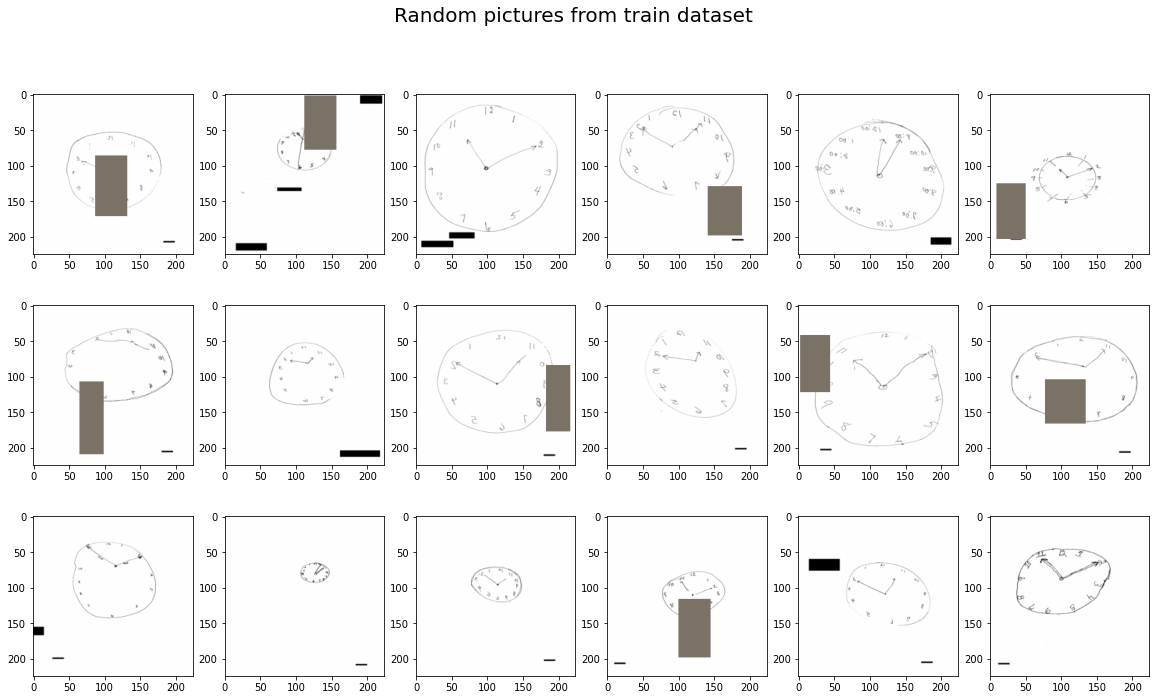

In [ ]:

fig, axs = plt.subplots(3, 6, figsize=(20,11))
fig.suptitle('Random pictures from train dataset', fontsize=20)
for ax in axs.flatten():
    n = np.random.randint(len(train_dataset))
    img = train_dataset[n][0]
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.4802, 0.4481, 0.3975])
    std = np.array([0.2302, 0.2265, 0.2262])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    

Model Training

In [ ]:

def training(model, model_name, num_epochs, train_dataloader, val_dataloader):
    cout , couv = 0,0
    loss_function = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.003)  #original 0.0003
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.33)

    train_loss_array = []
    train_acc_array = []
    val_loss_array = []
    val_acc_array = []
    lowest_val_loss = np.inf
    best_model = None

    for epoch in tqdm(range(num_epochs)):

        print('\nEpoch: {} | Learning rate: {}'.format(epoch + 1, scheduler.get_lr()))

        for phase in ['train', 'val']:
            print('train')
            epoch_loss = 0
            epoch_correct_items = 0
            epoch_items = 0

            if phase == 'train':
                model.train()
                with torch.enable_grad():
                    for samples, targets in train_dataloader:
                        print("new sample for training"+str(cout))
                        samples = samples.to(DEVICE)
                        targets = targets.to(DEVICE)

                        optimizer.zero_grad()
                        outputs = model(samples)
                        loss = loss_function(outputs, targets)
                        preds = outputs.argmax(dim=1)
                        correct_items = (preds == targets).float().sum()
                        
                        loss.backward()
                        optimizer.step()

                        epoch_loss += loss.item()
                        epoch_correct_items += correct_items.item()
                        epoch_items += len(targets)
                        cout += 1

                train_loss_array.append(epoch_loss / epoch_items)
                train_acc_array.append(epoch_correct_items / epoch_items)

                scheduler.step()

            elif phase == 'val':
                model.eval()
                with torch.no_grad():
                    for samples, targets in val_dataloader:
                        print("new sample for validating"+str(couv))
                        samples = samples.to(DEVICE)
                        targets = targets.to(DEVICE)

                        outputs = model(samples)
                        loss = loss_function(outputs, targets)
                        preds = outputs.argmax(dim=1)
                        correct_items = (preds == targets).float().sum()

                        epoch_loss += loss.item()
                        epoch_correct_items += correct_items.item()
                        epoch_items += len(targets)
                        couv += 1

                val_loss_array.append(epoch_loss / epoch_items)
                val_acc_array.append(epoch_correct_items / epoch_items)

                if epoch_loss / epoch_items < lowest_val_loss:
                    lowest_val_loss = epoch_loss / epoch_items
                    torch.save(model.state_dict(), '{}_weights.pth'.format(model_name))
                    best_model = copy.deepcopy(model)
                    print("\t| New lowest val loss for {}: {}".format(model_name, lowest_val_loss))

    return best_model, train_loss_array, train_acc_array, val_loss_array, val_acc_array
    
    
def visualize_training_results(train_loss_array,
                               val_loss_array,
                               train_acc_array,
                               val_acc_array,
                               num_epochs,
                               model_name,
                               batch_size):
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    fig.suptitle("{} training | Batch size: {}".format(model_name, batch_size), fontsize = 16)
    axs[0].plot(list(range(1, num_epochs+1)), train_loss_array, label="train_loss")
    axs[0].plot(list(range(1, num_epochs+1)), val_loss_array, label="val_loss")
    axs[0].legend(loc='best')
    axs[0].set(xlabel='epochs', ylabel='loss')
    axs[1].plot(list(range(1, num_epochs+1)), train_acc_array, label="train_acc")
    axs[1].plot(list(range(1, num_epochs+1)), val_acc_array, label="val_acc")
    axs[1].legend(loc='best')
    axs[1].set(xlabel='epochs', ylabel='accuracy')
    plt.show()

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
num_epochs = 5       '''change to 9 '''

**DenseNet**

In [ ]:

model_densenet161 = models.densenet161(pretrained=True)
for param in model_densenet161.parameters():
    param.requires_grad = False
model_densenet161.classifier = torch.nn.Linear(model_densenet161.classifier.in_features, out_features=6)
model_densenet161 = model_densenet161.to(DEVICE)

densenet161_training_results = training(model=model_densenet161,
                                        model_name='DenseNet161',
                                        num_epochs=num_epochs,
                                        train_dataloader=train_dataloader,
                                        val_dataloader=val_dataloader)

model_densenet161, train_loss_array, train_acc_array, val_loss_array, val_acc_array = densenet161_training_results

min_loss = min(val_loss_array)
min_loss_epoch = val_loss_array.index(min_loss)
min_loss_accuracy = val_acc_array[min_loss_epoch]

visualize_training_results(train_loss_array,
                           val_loss_array,
                           train_acc_array,
                           val_acc_array,
                           num_epochs,
                           model_name="DenseNet161",
                           batch_size=64)
print("\nTraining results:")
print("\tMin val loss {:.4f} was achieved during epoch #{}".format(min_loss, min_loss_epoch + 1))
print("\tVal accuracy during min val loss is {:.4f}".format(min_loss_accuracy))

**Resnet**


In [ ]:
model_resnet152 = models.resnet152(pretrained=True)
for param in model_resnet152.parameters():
    param.requires_grad = False
model_resnet152.fc = torch.nn.Linear(model_resnet152.fc.in_features, 6 )
model_resnet152 = model_resnet152.to(DEVICE) 

resnet152_training_results = training(model=model_resnet152,
                                      model_name='ResNet152',
                                      num_epochs=num_epochs,
                                      train_dataloader=train_dataloader,
                                      val_dataloader=val_dataloader)

model_resnet152, train_loss_array, train_acc_array, val_loss_array, val_acc_array = resnet152_training_results

min_loss = min(val_loss_array)
min_loss_epoch = val_loss_array.index(min_loss)
min_loss_accuracy = val_acc_array[min_loss_epoch]

visualize_training_results(train_loss_array,
                           val_loss_array,
                           train_acc_array,
                           val_acc_array,
                           num_epochs,
                           model_name="ResNet152",
                           batch_size=64)
print("\nTraining results:")
print("\tMin val loss {:.4f} was achieved during epoch #{}".format(min_loss, min_loss_epoch + 1))
print("\tVal accuracy during min val loss is {:.4f}".format(min_loss_accuracy))


VGG19

In [ ]:
model_vgg19_bn = models.vgg19_bn(pretrained=True)
for param in model_vgg19_bn.parameters():
    param.requires_grad = False
model_vgg19_bn.classifier[6] = torch.nn.Linear(in_features=model_vgg19_bn.classifier[6].in_features, out_features=6)
model_vgg19_bn = model_vgg19_bn.to(DEVICE)

vgg19_bn_training_results = training(model=model_vgg19_bn,
                                     model_name='VGG19_bn',
                                     num_epochs=num_epochs,
                                     train_dataloader=train_dataloader,
                                     val_dataloader=val_dataloader)

model_vgg19_bn, train_loss_array, train_acc_array, val_loss_array, val_acc_array = vgg19_bn_training_results

min_loss = min(val_loss_array)
min_loss_epoch = val_loss_array.index(min_loss)
min_loss_accuracy = val_acc_array[min_loss_epoch]

visualize_training_results(train_loss_array,
                           val_loss_array,
                           train_acc_array,
                           val_acc_array,
                           num_epochs,
                           model_name="VGG19_bn",
                           batch_size=64)
print("\nTraining results:")
print("\tMin val loss {:.4f} was achieved during epoch #{}".format(min_loss, min_loss_epoch + 1))
print("\tVal accuracy during min val loss is {:.4f}".format(min_loss_accuracy))

**Ensemble**

In [ ]:
class EnsembleModel(nn.Module):   
    def __init__(self, modelA, modelB, modelC):
        super().__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.modelC = modelC
        self.classifier = nn.Linear(6 * 3, 6)  #originally 200*3 , 200
        
    def forward(self, x):
        x1 = self.modelA(x)
        x2 = self.modelB(x)
        x3 = self.modelC(x)
        x = torch.cat((x1, x2, x3), dim=1)
        out = self.classifier(x)
        return out
    
ensemble_model = EnsembleModel(model_densenet161, model_resnet152, model_vgg19_bn)

for param in ensemble_model.parameters():
    param.requires_grad = False

for param in ensemble_model.classifier.parameters():
    param.requires_grad = True    

ensemble_model = ensemble_model.to(DEVICE)

In [ ]:
ens_epoch = 10

ensemble_training_results = training(model=ensemble_model,
                                     model_name='Ensemble',
                                     num_epochs= ens_epoch ,  # decide depending on the time 
                                     train_dataloader=train_dataloader,
                                     val_dataloader=val_dataloader)

ensemble_model, train_loss_array, train_acc_array, val_loss_array, val_acc_array = ensemble_training_results

min_loss = min(val_loss_array)
min_loss_iteration = val_loss_array.index(min_loss)
min_loss_accuracy = val_acc_array[min_loss_iteration]

visualize_training_results(train_loss_array,
                           val_loss_array,
                           train_acc_array,
                           val_acc_array,
                           num_epochs= ens_epoch ,
                           model_name="Ensemble model",
                           batch_size=64)
print("\nTraining results:")
print("\tMin val loss {:.4f} was achieved during iteration #{}".format(min_loss, min_loss_iteration + 1))
print("\tVal accuracy during min val loss is {:.4f}".format(min_loss_accuracy))

In [ ]:
#We now have 
#model_densenet161
#model_resnet152
#model_vgg19_bn

#ensemble_model


Testing our data

Testing Densenet161

In [ ]:

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False) #---------------------run 3

den_all_preds = []
den_all_files = []

model_densenet161.eval()
with torch.no_grad():
    for samples, f_names in tqdm(test_dataloader):
        samples = samples.to(DEVICE)
        outputs = model_densenet161(samples)
        preds = outputs.argmax(dim=1)
        den_all_preds.extend(preds.tolist())
        den_all_files.extend(f_names)




100%|██████████| 9/9 [06:51<00:00, 45.75s/it]


In [ ]:
print(len(den_all_files))
for i in den_all_files :
  print(i[63:len(i)-3])    # -----------------------------------------run 4

In [ ]:
den_all_filenames = [ f"{f_name[64:len(f_name)-3]}0"     for f_name in den_all_files]   #???????????? check with 30 try print what f_name is in my case 
# all_preds_decoded = encoder_labels.inverse_transform(all_preds)


In [ ]:
for i in den_all_filenames:
  print(i)

In [ ]:
print(len(den_all_preds))
print(den_all_preds)

558
[4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 3, 4, 4, 5, 5, 4, 4, 4, 3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 4, 3, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 1, 5, 4, 4, 5, 3, 5, 4, 4, 2, 4, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4, 4, 3, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 3, 2, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 3, 4, 5, 5, 5, 4, 4, 5, 4, 4, 3, 4, 4, 5, 4, 4, 4, 3, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 5, 3, 5, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 3, 4, 4, 4, 4, 5, 5, 5, 3, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 5, 5, 2, 2, 5, 4, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 2, 4, 5, 4, 4, 5, 5, 4, 5, 5, 3, 4, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 5,

In [ ]:
den_all_filenames[2]

'20004712.0'

In [ ]:

submission_densenet161_df = pd.DataFrame(list(zip(den_all_filenames, den_all_preds)), columns =['id', 'tar'])
submission_densenet161_df.to_csv('test_predictions2_densenet161_ep5_lr003.csv' , index =False) 
print(submission_densenet161_df.head(10))
submission_densenet161_df.describe()

           id  tar
0  10002998.0    4
1  10003172.0    4
2  20004712.0    4
3  20004205.0    5
4  20000346.0    4
5  10010181.0    5
6  10004620.0    5
7  20006312.0    5
8  20003072.0    4
9  20005080.0    4


,tar
count,558.000000
mean,4.306452
std,0.691831
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


Testing Resnet 

In [ ]:

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False) #---------------------run 3

ren_all_preds = []
ren_all_files = []

model_resnet152.eval()
with torch.no_grad():
    for samples, f_names in tqdm(test_dataloader):
        samples = samples.to(DEVICE)
        outputs = model_resnet152(samples)
        preds = outputs.argmax(dim=1)
        ren_all_preds.extend(preds.tolist())
        ren_all_files.extend(f_names)



In [ ]:
ren_all_filenames = [ f"{f_name[64:len(f_name)-3]}0"     for f_name in ren_all_files]  

In [ ]:
print(len(ren_all_files))
for i in ren_all_files :
  print(i[63:len(i)-3])    # -----------------------------------------run 4

In [ ]:
for i in ren_all_filenames:
  print(i)

In [ ]:
print(len(ren_all_preds))
print(ren_all_preds)

558
[4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 3, 4, 4, 5, 5, 4, 4, 4, 3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 4, 3, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 1, 5, 4, 4, 5, 3, 5, 4, 4, 2, 4, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4, 4, 3, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 3, 2, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 3, 4, 5, 5, 5, 4, 4, 5, 4, 4, 3, 4, 4, 5, 4, 4, 4, 3, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 5, 3, 5, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 3, 4, 4, 4, 4, 5, 5, 5, 3, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 5, 5, 2, 2, 5, 4, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 2, 4, 5, 4, 4, 5, 5, 4, 5, 5, 3, 4, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 5,

In [ ]:
submission_resnet152_df = pd.DataFrame(list(zip(ren_all_filenames, ren_all_preds)), columns =['id', 'tar'])
submission_resnet152_df.to_csv('test_predictions1_resnet_ep5_lr003.csv' , index =False) 
print(submission_resnet152_df.head(10))

Testing VGG19_bn

In [ ]:

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False) #---------------------run 3

vgg_all_preds = []
vgg_all_files = []

model_vgg19_bn.eval()
with torch.no_grad():
    for samples, f_names in tqdm(test_dataloader):
        samples = samples.to(DEVICE)
        outputs = model_vgg19_bn(samples)
        preds = outputs.argmax(dim=1)
        vgg_all_preds.extend(preds.tolist())
        vgg_all_files.extend(f_names)



In [ ]:
vgg_all_filenames = [ f"{f_name[64:len(f_name)-3]}0"     for f_name in vgg_all_files]  

In [ ]:
print(len(vgg_all_files))
for i in vgg_all_files :
  print(i[63:len(i)-3])    # -----------------------------------------run 4

In [ ]:
for i in vgg_all_filenames:
  print(i)

In [ ]:
print(len(vgg_all_preds))
print(vgg_all_preds)

558
[4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 3, 4, 4, 5, 5, 4, 4, 4, 3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 4, 3, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 1, 5, 4, 4, 5, 3, 5, 4, 4, 2, 4, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4, 4, 3, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 3, 2, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 3, 4, 5, 5, 5, 4, 4, 5, 4, 4, 3, 4, 4, 5, 4, 4, 4, 3, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 5, 3, 5, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 3, 4, 4, 4, 4, 5, 5, 5, 3, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 5, 5, 2, 2, 5, 4, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 2, 4, 5, 4, 4, 5, 5, 4, 5, 5, 3, 4, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 5,

In [ ]:
submission_vgg19_bn_df = pd.DataFrame(list(zip(vgg_all_filenames, vgg_all_preds)), columns =['id', 'tar'])
submission_vgg19_bn_df.to_csv('test_predictions1_vgg19_bn_ep5_lr003.csv' , index =False) 
print(submission_vgg19_bn_df.head(10))

Testing Ensemble

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

en_all_preds = []
en_all_files = []

ensemble_model.eval()
with torch.no_grad():
    for samples, f_names in tqdm(test_dataloader):
        samples = samples.to(DEVICE)
        outputs = ensemble_model(samples)
        preds = outputs.argmax(dim=1)
        en_all_preds.extend(preds.tolist())
        en_all_files.extend(f_names)

en_all_filenames = [ f"{f_name[64:len(f_name)-3]}0"     for f_name in en_all_files]

submission_ensemble_df = pd.DataFrame(list(zip(en_all_filenames, en_all_preds )), columns =['id', 'tar'])
submission_ensemble_df.to_csv('test_predictions_ensemble.csv', index=False) 
submission_ensemble_df.head(10)